## Basic filtering
This lab introduces neighborhood operations that can achieve effects such as blurring, sharpening, edge detection, and assist in removing noise.

In [266]:
import scipy.ndimage as ndi 
import numpy as np
import skimage
from skimage import io
from skimage import data, img_as_float
import matplotlib.pyplot as plt
import os, math
                                 

Consider a `5 x 5` toy example data and a uniform filter (a filter is also known as spatial mask)

In [267]:
x = (np.array([[17,24,1,8,15],[23,5,7,14,16],[4,6,13,20,22],[10,12,19,21,3],[11,18,25,2,9]])*10)
print(x.dtype, x, sep = "\n")
a = np.ones((3,3))/9 
print(a.dtype, a, sep = "\n")

int32
[[170 240  10  80 150]
 [230  50  70 140 160]
 [ 40  60 130 200 220]
 [100 120 190 210  30]
 [110 180 250  20  90]]
float64
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


We can use the `convolve` function to filter image `x` with spatial mask `a`. Check out the documentation to see how this function deals with the border.

In [268]:
?ndi.convolve

Signature:
ndi.convolve(
    input,
    weights,
    output=None,
    mode='reflect',
    cval=0.0,
    origin=0,
)
Docstring:
Multidimensional convolution.

The array is convolved with the given kernel.

Parameters
----------
input : array_like
    The input array.
weights : array_like
    Array of weights, same number of dimensions as input
output : array or dtype, optional
    The array in which to place the output, or the dtype of the
    returned array. By default an array of the same dtype as input
    will be created.
mode : {'reflect', 'constant', 'nearest', 'mirror', 'wrap'}, optional
    The `mode` parameter determines how the input array is extended
    beyond its boundaries. Default is 'reflect'. Behavior for each valid
    value is as follows:

    'reflect' (`d c b a | a b c d | d c b a`)
        The input is extended by reflecting about the edge of the last
        pixel. This mode is also sometimes referred to as half-sample
        symmetric.

    'constant' (`k k k k 

In [269]:
#The mode parameter, here set to ’constant’, tells the function that the image is to be padded with constant values,
#the default value of which is zero,
ndi.convolve(x,a,mode='constant') 

array([[ 76,  85,  65,  67,  58],
       [ 87, 111, 108, 128, 105],
       [ 66, 109, 130, 150, 106],
       [ 67, 131, 151, 148,  85],
       [ 56, 105, 107,  87,  38]])

Change the `filterSize` to determine impact on amount of blurring. Note, two images are being displayed, which deal with the border using a different mode (what is the default mode?)

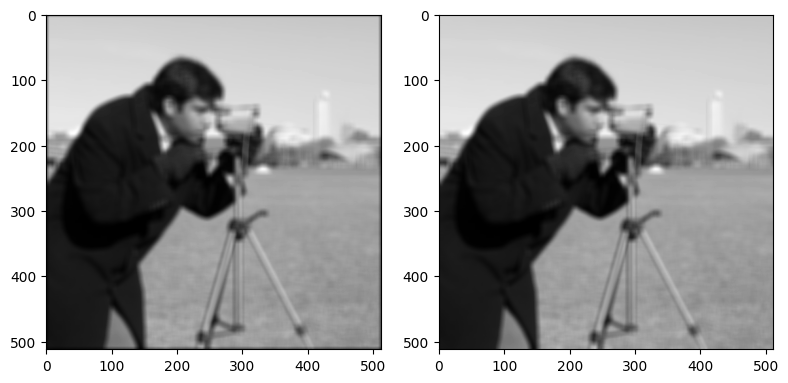

In [270]:
img = data.camera()

#In-built function for uniform filtering 
filterSize = 10
imgf = ndi.uniform_filter(img, filterSize, mode='constant')

#the default behavior of spatial convolution at the edges of the image is to reflect the image in all its edges.
imgf2 = ndi.uniform_filter(img, filterSize)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5)) #sharex = True, sharey = True
ax[0].imshow(imgf, cmap='gray') 
ax[1].imshow(imgf2, cmap='gray')

# prevent overlap of y-axis labels
plt.tight_layout()

### Blurring effect

Linear filters work by convoluting an image with a smaller template. That small template can be anything, but commonly it is a well-defined small matrix. Above, we saw it was a uniform matrix with a single value. 

It can also be a 2D Gaussian. We can have a look at its actual shape by filtering an image that has a single pixel ON:

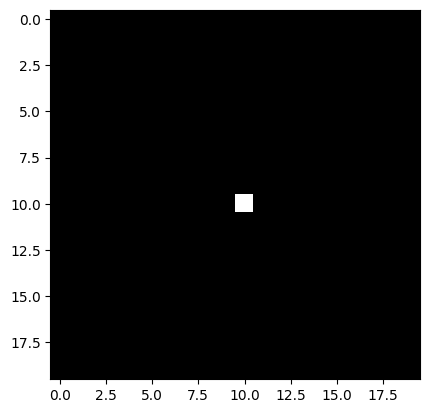

In [271]:
single_dot = np.zeros((20,20))
single_dot[10,10] = 1
plt.imshow(single_dot, cmap = 'gray');

The Gaussian has default values and we can simply apply it on an image:

In [272]:
?skimage.filters.gaussian

Signature:
skimage.filters.gaussian(
    image,
    sigma=1,
    output=None,
    mode='nearest',
    cval=0,
    multichannel=None,
    preserve_range=False,
    truncate=4.0,
    *,
    channel_axis=None,
)
Docstring:
Multi-dimensional Gaussian filter.

Parameters
----------
image : array-like
    Input image (grayscale or color) to filter.
sigma : scalar or sequence of scalars, optional
    Standard deviation for Gaussian kernel. The standard
    deviations of the Gaussian filter are given for each axis as a
    sequence, or as a single number, in which case it is equal for
    all axes.
output : array, optional
    The ``output`` parameter passes an array in which to store the
    filter output.
mode : {'reflect', 'constant', 'nearest', 'mirror', 'wrap'}, optional
    The ``mode`` parameter determines how the array borders are
    handled, where ``cval`` is the value when mode is equal to
    'constant'. Default is 'nearest'.
cval : scalar, optional
    Value to fill past edges of 

In [273]:
filtered = skimage.filters.gaussian(single_dot) #truncated by default at 4*sigma

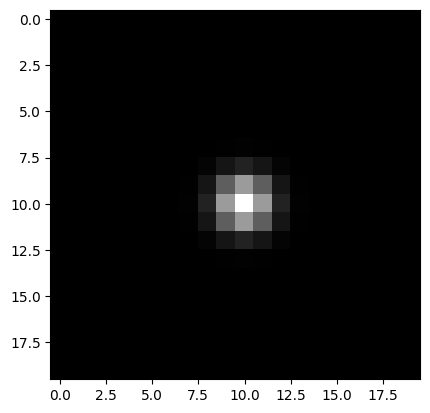

In [274]:
plt.imshow(filtered, cmap = 'gray');

We can just plot a cross section to better understand what happened:

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.33908537e-05 1.76806225e-03
 2.15394077e-02 9.65329280e-02 1.59155892e-01 9.65329280e-02
 2.15394077e-02 1.76806225e-03 5.33908537e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]


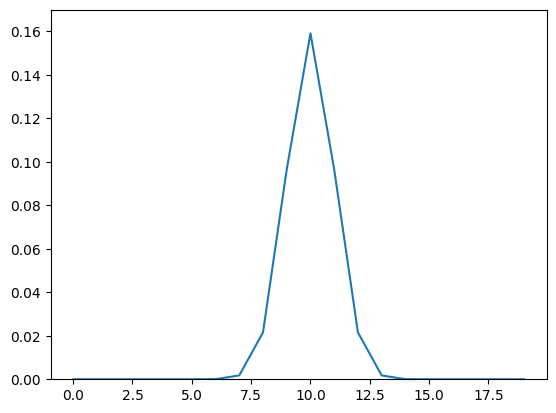

In [275]:
plt.plot(filtered[10,:]);
plt.ylim([0,0.17])
print(filtered[10,:])

The effect of this filtering was to "widen" the original single pixel, which is now spread out across the image. We can now also specify the width of the gaussian:

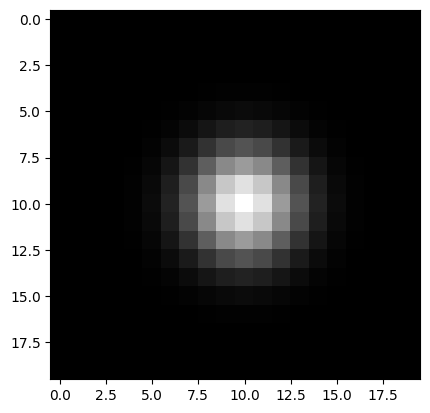

In [276]:
filtered = skimage.filters.gaussian(single_dot,sigma=2)
plt.imshow(filtered, cmap = 'gray');

Let us plot a cross section again:

Sum of all values in the filter =  1.0000000000000002


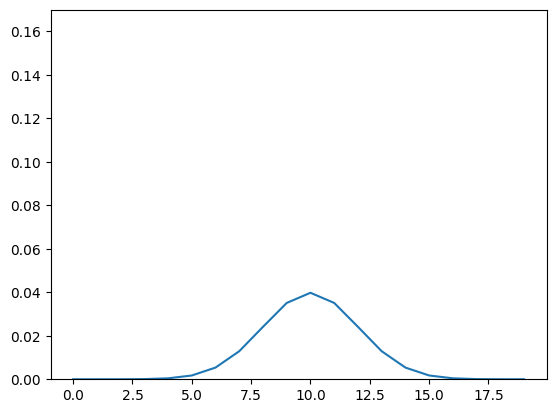

In [277]:
#print("Values in the cross-section:", filtered[10,:])
plt.plot(filtered[10,:]);
plt.ylim([0,0.17])

print("Sum of all values in the filter = ", filtered.sum())

The Gaussian has become even wider. Let's put two dots on our image and see what happens:

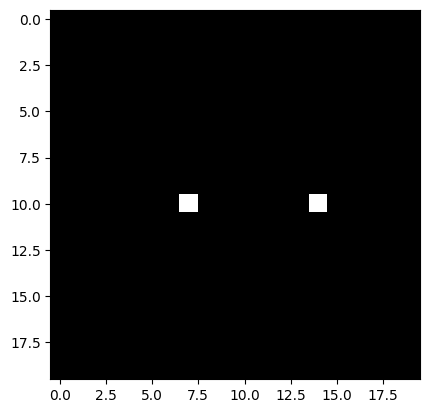

In [278]:
double_dot = np.zeros((20,20))
double_dot[10,7] = 1
double_dot[10,14] = 1
plt.imshow(double_dot, cmap = 'gray');

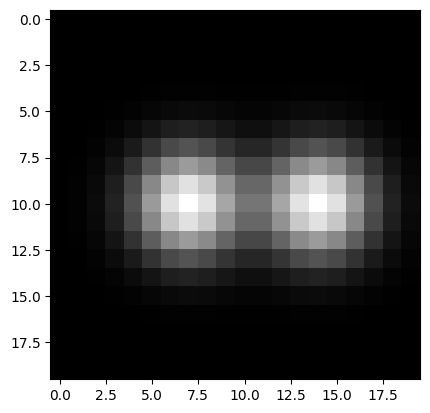

In [279]:
filtered = skimage.filters.gaussian(double_dot,sigma=2)
plt.imshow(filtered, cmap = 'gray');

The end effect is to blur our image. If we apply our filter twice we get an even blurrier image:

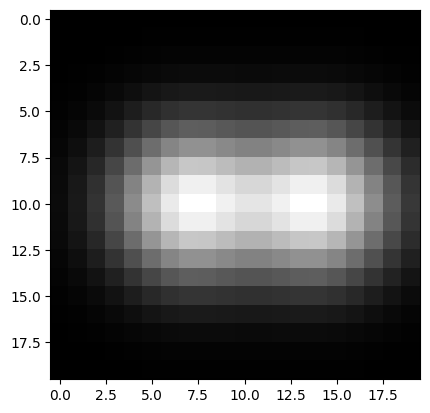

In [280]:
filtered2 = skimage.filters.gaussian(filtered,sigma=2)
plt.imshow(filtered2, cmap = 'gray');

### Low pass filters
Both the uniform and Gaussian filters belong to what are known as "low pass filters". The terminology is related to understanding of images in a frequency domain. We won't discuss in much detail but the broad idea is that "low frequencies" correspond to slow changes in intensity in the image whereas "high frequencies" manifest as edges or any kind of abrupt changes in image intensity. So, a low-**pass** filter keeps the "low frequencies" in images and blocks the "high frequencies" in the image, essentially blurring the image.

Let us apply the Gaussian filter to an image. 

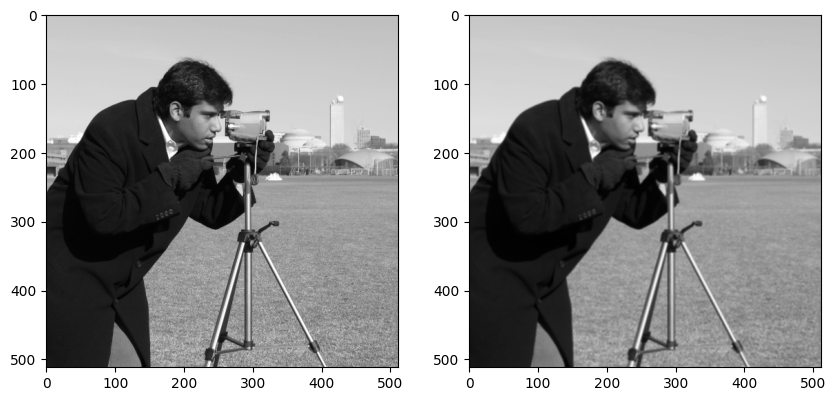

In [367]:
from os import truncate


img = data.camera()

filtered = skimage.filters.gaussian(img,sigma=10, truncate=0.1)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5)) #sharex = True, sharey = True
ax[0].imshow(img, cmap='gray') 
ax[1].imshow(filtered, cmap='gray')

## Part A

Change the `sigma` value. What do you observe? Write your observations below.

Then, truncate the `gaussian` filter function to only `1` standard deviation. Why does the filtered output change? 

Changing the sigma value blurrs the immage more and gets rid of more noise. 1 Standard deviation still amounts to 68% of the affected image.

## Edge Detection using High-pass filters
Similar to the low-pass filters, high-**pass** filters keep the "high frequencies" in images and block the "low frequencies" in the image, essentially finding edges in the image.

Let us begin with a toy example of an edge that is a single column of bright line in a dark background.

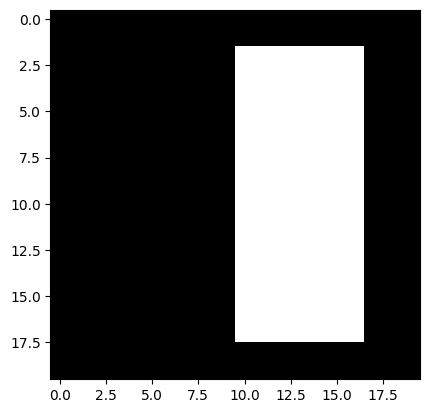

In [282]:
single_line = np.zeros((20,20))
single_line[2:-2,10:17] = 1
plt.imshow(single_line, cmap = 'gray');

### First-order difference operator
Apply a first-order difference operator `[1, 0, -1]` to this toy image. 

Advanced note: to extend this to 2D, multiply a `3 x 1` averaging mask `[1, 1, 1]'` to the `1 x 3` first-order difference operator  `[1, 0, -1]` to get the`3 x 3` 2D first-order difference operator:
`[1, 1, 1]' * [1, 0, -1] =`

$$\begin{bmatrix} 1 & 0 & -1 \\ 1 & 0 & -1 \\ 1 & 0 & -1 \end{bmatrix}$$

[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]


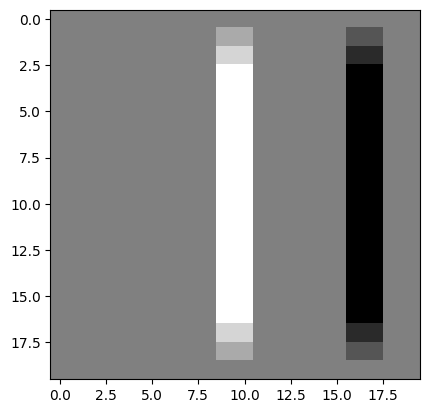

In [283]:
f = np.array([[1,0,-1],[1,0,-1],[1,0,-1]]) #(first-order difference in x; smoothing in y)
print(f)
filtered = ndi.convolve(single_line,f) 
plt.imshow(filtered, cmap = 'gray');

Let us plot a cross section to better understand what's happening:

Sum of all values in the filter =  0.0


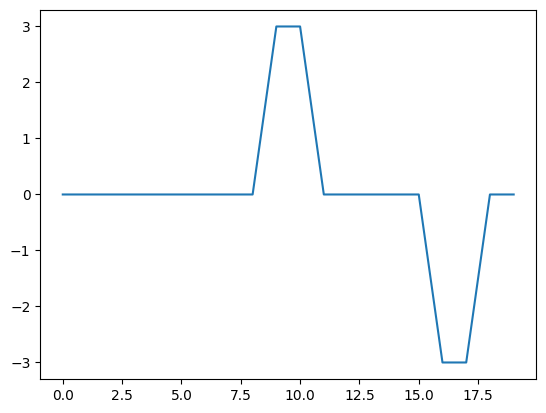

In [284]:
plt.plot(filtered[10,:]);
print("Sum of all values in the filter = ", filtered.sum())

## Part B

Note how the first-order difference filter responds to each side of the edge. 

What do you observe as the width of the edge is increased? For example from 1 pixel (current) to 3-pixels to 5-pixels? Write your observations below.

The filter alters the image by altering both sides of the outlying pixel. The changes on each side are larger when the width is wider. 

### Second-order difference operator
Now apply a second-order difference operator `[1, -2, 1]` to this toy image. 

Advanced note: to extend this to 2D, multiply a `3 x 1` averaging mask `[1, 1, 1]'` to the `1 x 3` second-order difference operator  `[1, -2, 1]` to get the`3 x 3` 2D first-order difference operator:
`[1, 1, 1]' * [1, -2, 1] =`

$$\begin{bmatrix} 1 & -2 & 1 \\ 1 & -2 & 1 \\ 1 & -2 & 1 \end{bmatrix}$$

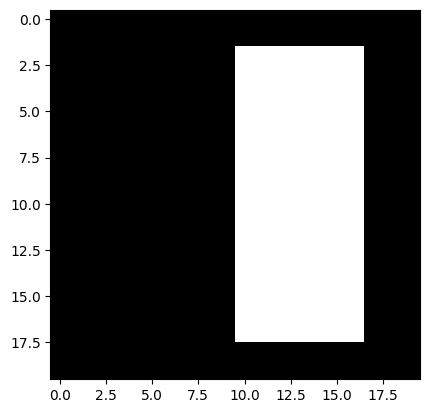

In [285]:
#reset the image
single_line = np.zeros((20,20))
single_line[2:-2,10:17] = 1
plt.imshow(single_line, cmap = 'gray');

[[ 1 -2  1]
 [ 1 -2  1]
 [ 1 -2  1]]


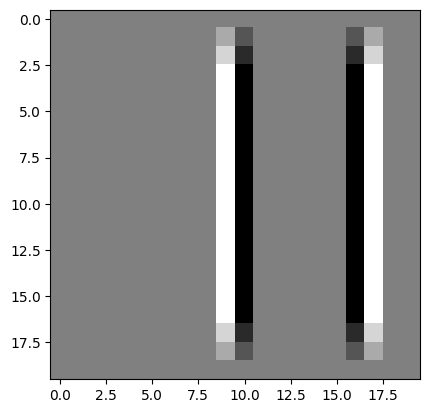

In [286]:
f = np.array([[1,-2,1],[1,-2,1],[1,-2,1]]) #second-order difference operator in x (smoothing in y)
print(f)
filtered = ndi.convolve(single_line,f)
plt.imshow(filtered, cmap = 'gray');

Sum of all values in the filter =  0.0


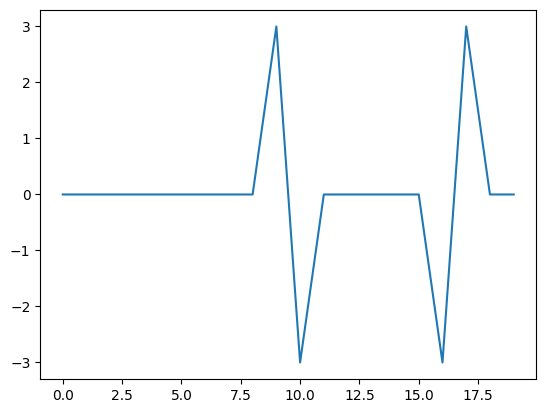

In [287]:
plt.plot(filtered[10,:]); 
print("Sum of all values in the filter = ", filtered.sum())

## Part C

Note how the second-order difference filter responds to each side of the edge. 
 - How does it differ from the response in Part B?
 - What do you observe as the width of the edge is increased? For example from 1 pixel (current) to 5-pixels to 9-pixels? Write your observations below.

The filter changes the image by inverting the outlying pixels and altering the sides with the original pixel. With a wider width, the altered region stays near the edges of pixels that differ. Other pixels that do not differ are turned nuetral.

Let us repeat applying the first-order difference and second-order difference operators to a "ramp edge" (an edge that slowly ramps up from 0 to 1)

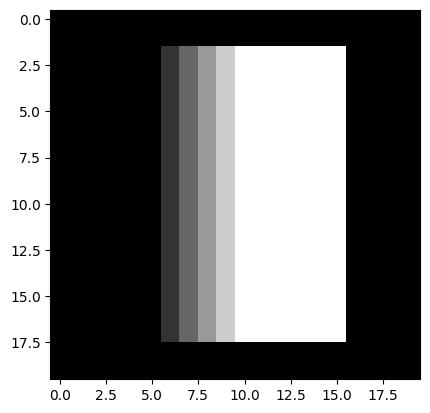

In [288]:
ramp_edge = np.zeros((20,20))
#ramp_edge[2:-2,3:12] = np.arange(0.1,1,0.1)
#ramp_edge[2:-2,12:16] = 1
ramp_edge[2:-2,6:10] = np.arange(0.2,1,0.2)
ramp_edge[2:-2,10:16] = 1
plt.imshow(ramp_edge, cmap = 'gray');

A cross-section again to visualize the "ramp edge"

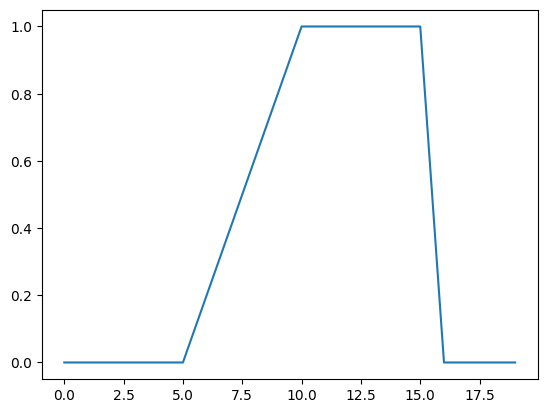

In [289]:
plt.plot(ramp_edge[10,:]);

Apply first-order difference operator:

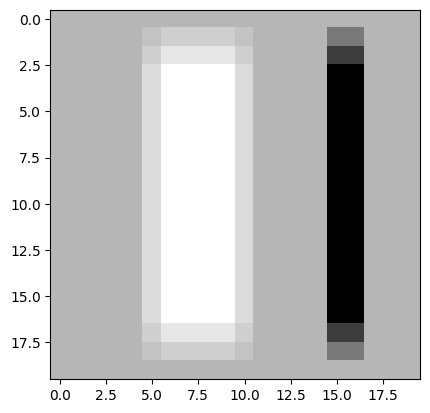

In [290]:
f = np.array([[1,0,-1],[1,0,-1],[1,0,-1]]) 
filtered = ndi.convolve(ramp_edge,f) 
plt.imshow(filtered, cmap = 'gray');

Sum of all values in the filter =  8.881784197001252e-16


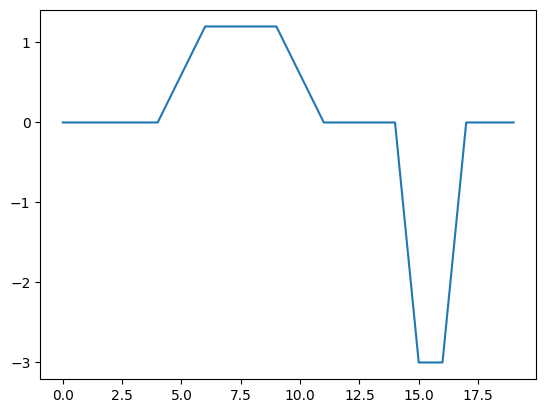

In [291]:
plt.plot(filtered[10,:]);
print("Sum of all values in the filter = ", filtered.sum())

Apply second-order difference operator:

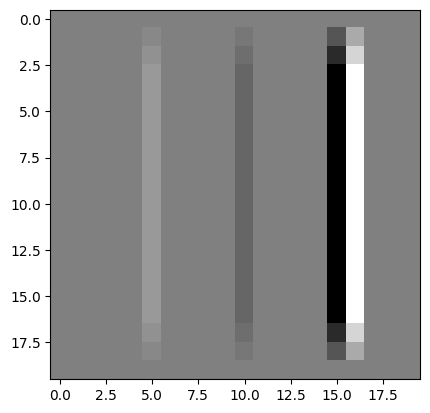

In [292]:
f = np.array([[1,-2,1],[1,-2,1],[1,-2,1]]) 
filtered = ndi.convolve(ramp_edge,f)
plt.imshow(filtered, cmap = 'gray');

Sum of all values in the filter =  -8.881784197001252e-16


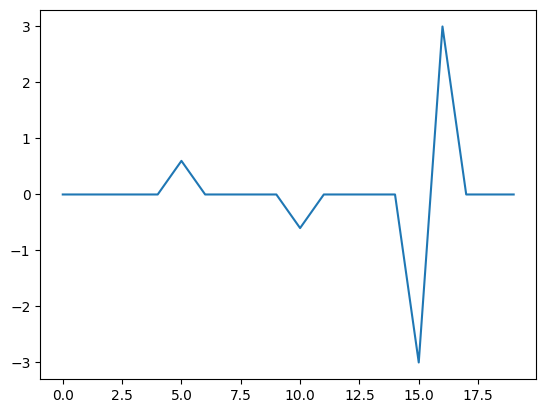

In [293]:
plt.plot(filtered[10,:]);
print("Sum of all values in the filter = ", filtered.sum())

## Part D

Note the response of each filter on each side of the ramp edge. How do these responses differ from before (no ramp edge)? Write your observations below.

The 1st-order difference shows that when there is a larger change in values, there is more contrast. The ramp part is minimal changes so it grouped togerther and wider. The 2nd-order difference shows something interesting in which the ramp does not translate after the convolve. The right and left border is expected but the middle of ramp takes a small bump downwards.

## Sobel, Prewitt, and Laplace operators

See this [comparison of different edge-detection methods](https://medium.com/@nikatsanka/comparing-edge-detection-methods-638a2919476e) for a review

Can you tell which of these are based on first-order difference and which on second-order difference?

In [294]:
from skimage.filters import sobel, prewitt

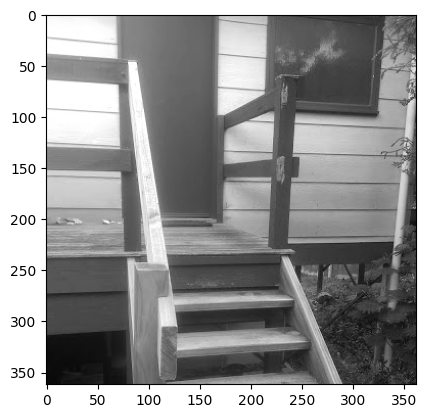

In [295]:
#our test case: stairs
filename = os.path.join( 'stairs.png')
img = io.imread(filename) 
plt.imshow(img, cmap = 'gray')

### Using in-built functions

(362, 362) uint8 float64 float64
0.0 0.45114234091327077
0.0 0.43796312214169625
236.4650336370023


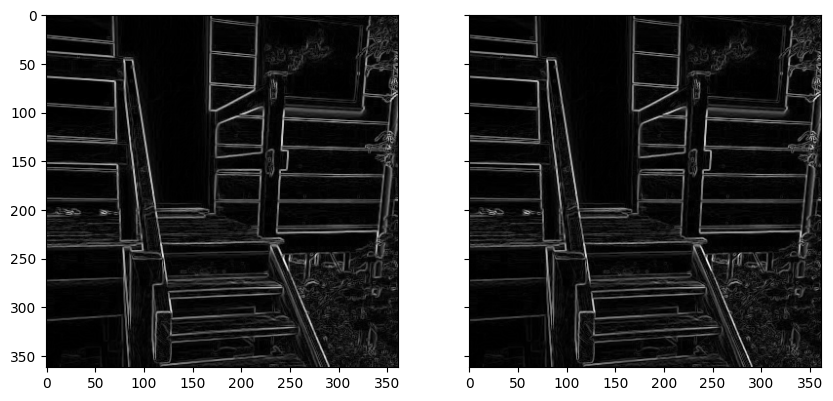

In [296]:
edge_p = prewitt(img)
edge_s = sobel(img)
print(img.shape, img.dtype, edge_p.dtype, edge_s.dtype)
print(edge_s.min(), edge_s.max())
print(edge_p.min(), edge_p.max())
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 8), sharex = True, sharey = True) #figsize controls relative size of images
ax = ax.ravel()
ax[0].imshow(edge_p, cmap = 'gray')
ax[1].imshow(edge_s, cmap = 'gray')
print(sum(sum(abs(edge_p - edge_s))))

### Creating and applying Sobel filters "manually"
This involves applying two filters: filter in `x` direction (responds to vertical lines), and filter in `y` direction (responds to horizontal lines). 

**Gradient**: The response to the filter in `x` direction is also called as the gradient in `x` (mathematically, partial derivative with respect to `x`), and the response to the filter in `y` direction is also called as the gradient in `y` (mathematically, partial derivative with respect to `y`). 

**Gradient Magnitude**: The magnitude of gradient is nothing but the square root of the sum of square of each gradient. Whaaaaaat?? This may be makes a bit more sense? ----->

![gradients](gradient.png)


Range of gradients =  -2.3098039215686272 2.431372549019607 -2.117647058823529 1.8352941176470594
float64 (362, 362)
Manual sobel range =  0.0 2.552046468321176
In-built sobel range =  0.0 0.45114234091327077


Text(0.5, 1.0, 'Sobel Magnitude (in-built)')

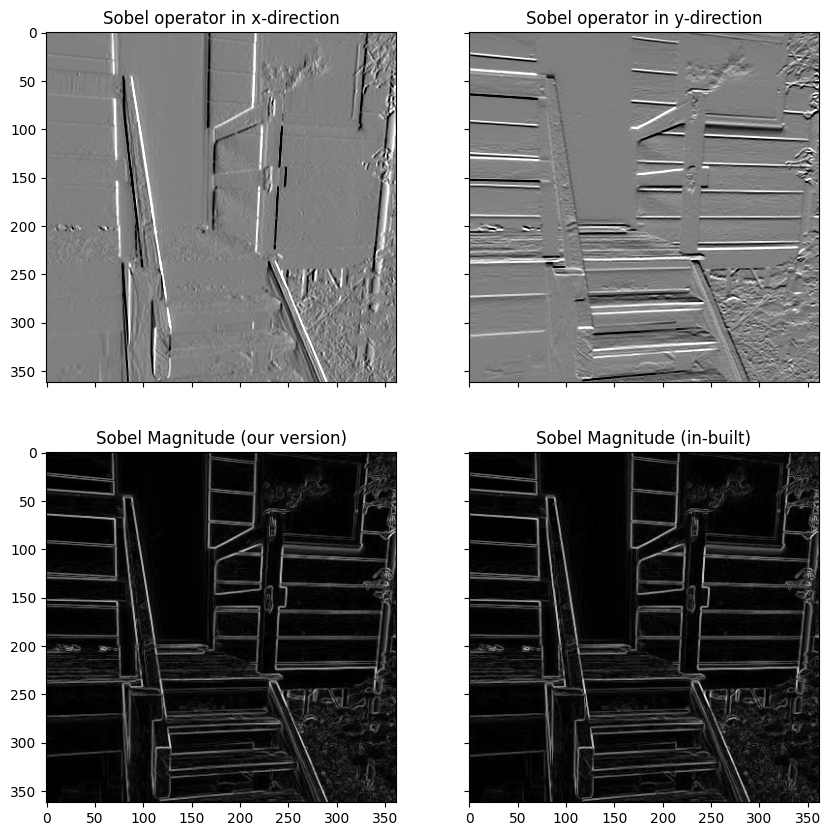

In [297]:
#Apply sobel filters manually
sobelx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]]) 
sobely = np.transpose(sobelx) #transpose of the matrix sobely

#Convolve image with filer. Make sure to convert to float (oterhwise, uint8 issues!)
sx = ndi.convolve(img_as_float(img),sobelx)
sy = ndi.convolve(img_as_float(img),sobely)

print("Range of gradients = ", sx.min(), sx.max(), sy.min(), sy.max())
mag = sx**2 + sy**2
print(mag.dtype, mag.shape)
edge_sobel = np.sqrt(sx**2 + sy**2)
print("Manual sobel range = ", edge_sobel.min(), edge_sobel.max())
print("In-built sobel range = ", edge_s.min(), edge_s.max())
      
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), sharex = True, sharey = True) 
ax = ax.ravel()
ax[0].imshow(sx, cmap = 'gray', vmin = -1, vmax = 1)
ax[0].set_title("Sobel operator in x-direction")
ax[1].imshow(sy, cmap = 'gray', vmin = -1, vmax = 1)
ax[1].set_title("Sobel operator in y-direction")
ax[2].imshow(edge_sobel, cmap = 'gray')
ax[2].set_title("Sobel Magnitude (our version)")
ax[3].imshow(edge_s, cmap = 'gray')
ax[3].set_title("Sobel Magnitude (in-built)")


## Part E (10 points)
One application of high pass filters are to "boost" the original image. That is, enhance the edges or the "sharpness" 
of the image.  Such filters are known as `high boost` filters, obtained by:

$$high boost = A*(original) - (low pass)$$

Where `A` is an amplification factor. If `A = 1`, then the high boost filter becomes an ordinary high pass filter. Why? Because a high pass filter response is nothing but removing the low pass reponse from the image. In other words, it is simply the low pass response subtracted from the original image.

To see this better, we can also write the high boost formula above as:

$$\begin{align} 
high boost &= A*(original) - (low pass)\\
&= A*(original) - (original - (high pass))\\
&=(A-1)*(original) + (high pass)
\end{align}$$

When `A=1`, we are left with the high pass response. 

In this part, you will implement a `high boost` filter.



In [298]:
def highBoost(original, A, sigma = 2):
    '''
    Generates and returns the high boost filter response using the formula 
    high boost = A*(original) - (low pass)
    The low pass filter response is generated by applying the Gaussian filter with sigma.
    '''
    #work in the float dtype
    assert(original.dtype == 'float64')
    # YOUR CODE HERE
    lowPass = skimage.filters.gaussian(original, sigma)
    return ((original * A) - lowPass)


-0.3132054374190089 0.27392530494432554
Success!


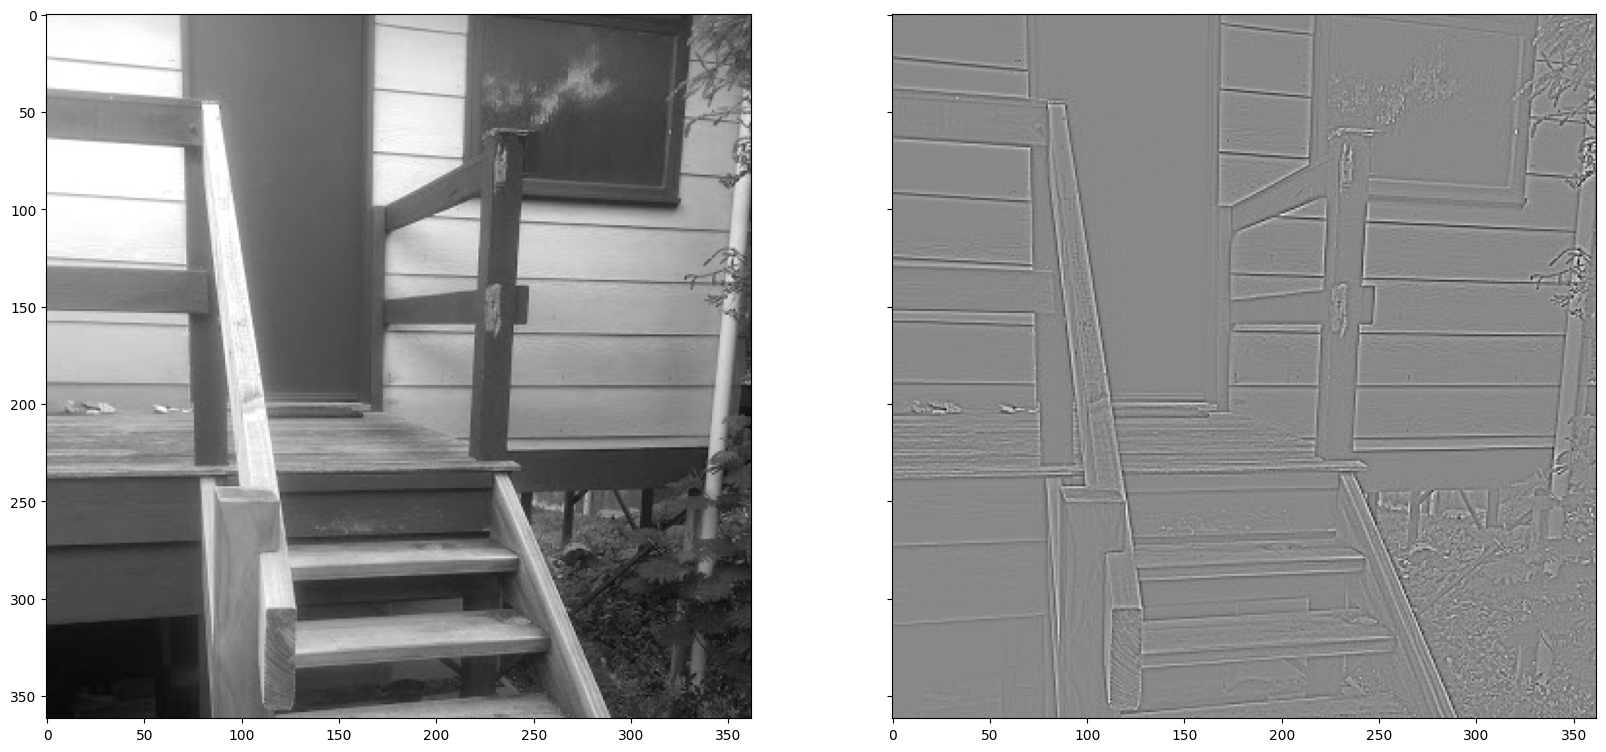

In [299]:
ampFactor = 1
sigma = 1
#our test case: stairs
filename = 'stairs.png'#'koala.png'
img = img_as_float(io.imread(filename))
highb = highBoost(img, ampFactor, sigma)
print(highb.min(), highb.max()) 

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), sharex = True, sharey = True) #figsize controls relative size of images
ax = ax.ravel()
ax[0].imshow(img, cmap = 'gray')
ax[1].imshow(highb, cmap = 'gray')

assert(math.isclose(highb.std(), 0.0311231483))
print("Success!")


-0.2208061446820285 1.2565893332972635
Success!


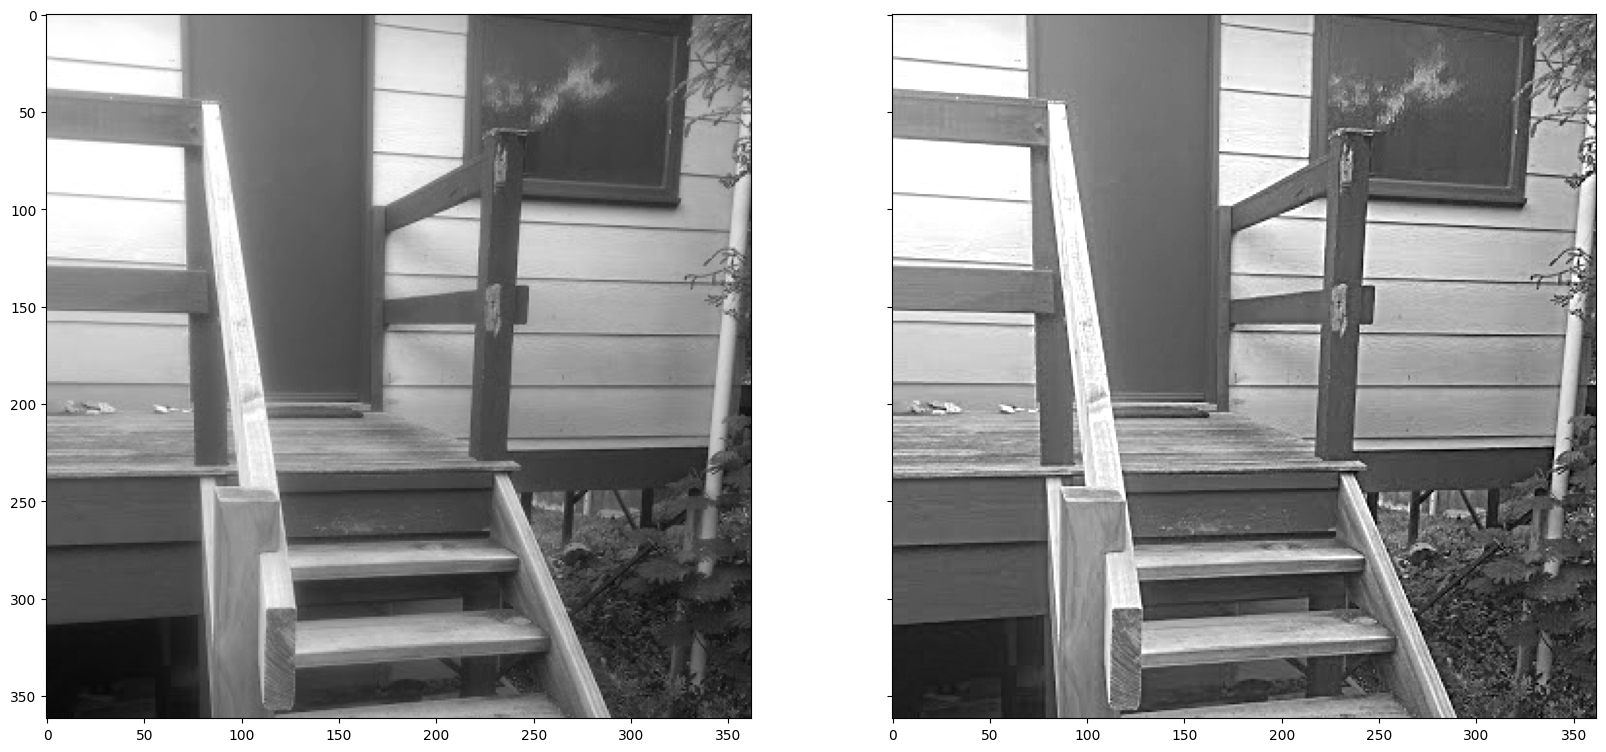

In [300]:
ampFactor = 2
sigma = 2
#our test case: stairs
filename = 'stairs.png'#'koala.png'
img = img_as_float(io.imread(filename))
highb = highBoost(img, ampFactor, sigma)
print(highb.min(), highb.max())

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), sharex = True, sharey = True) #figsize controls relative size of images
ax = ax.ravel()
ax[0].imshow(img, cmap = 'gray')
ax[1].imshow(highb, cmap = 'gray', vmin=0, vmax=1)

assert(math.isclose(highb.std(), 0.2458785097))
print("Success!")


-0.22847704481194664 1.6653543678383977
Success!


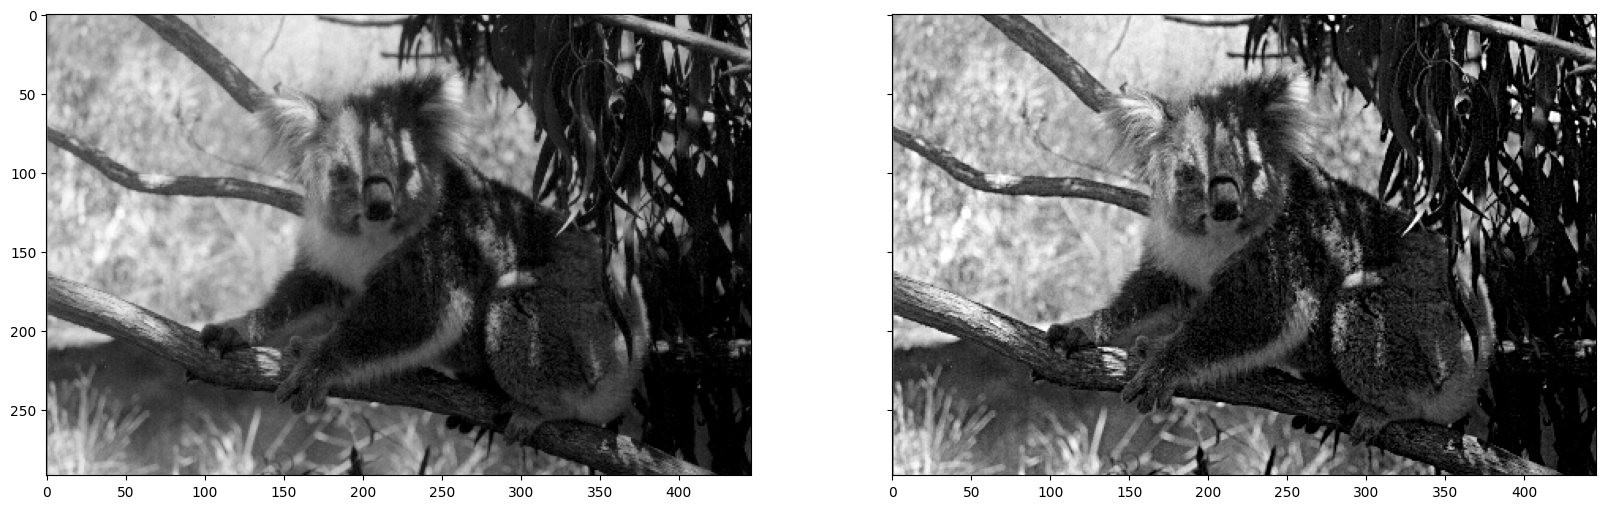

In [301]:
ampFactor = 2.5
sigma = 2
#our test case: Koala
filename = 'koala.png'
img = img_as_float(io.imread(filename))
highb = highBoost(img, ampFactor, sigma)
print(highb.min(), highb.max())

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), sharex = True, sharey = True) #figsize controls relative size of images
ax = ax.ravel()
ax[0].imshow(img, cmap = 'gray')
ax[1].imshow(highb, cmap = 'gray', vmin=0, vmax=1.4)

assert(math.isclose(highb.std(), 0.411406411))
print("Success!")


### Creating and applying Laplacian filter "manually"

Similar to Sobel filter, a Laplacian filter can be used to find edges. Laplacian is a second-order difference operator. We have seen a 1D version of a second-order diference operator earlier: `[1, -2, 1]`. Applying these in both directions gives us the [2D version](https://theailearner.com/2019/05/25/laplacian-of-gaussian-log/):

$$\begin{bmatrix} 0 & 1 & 0 \\ 1 & -4 & 1 \\  0 & 1 & 0 \end{bmatrix}$$


Unlike the Sobel, it uses a single mask to respond to edges. It is "isotropic", meaning the response is same in all directions. 

In-built laplace float64 0.0 1.396078431372549
Manually laplace float64 0.0 1.396078431372549


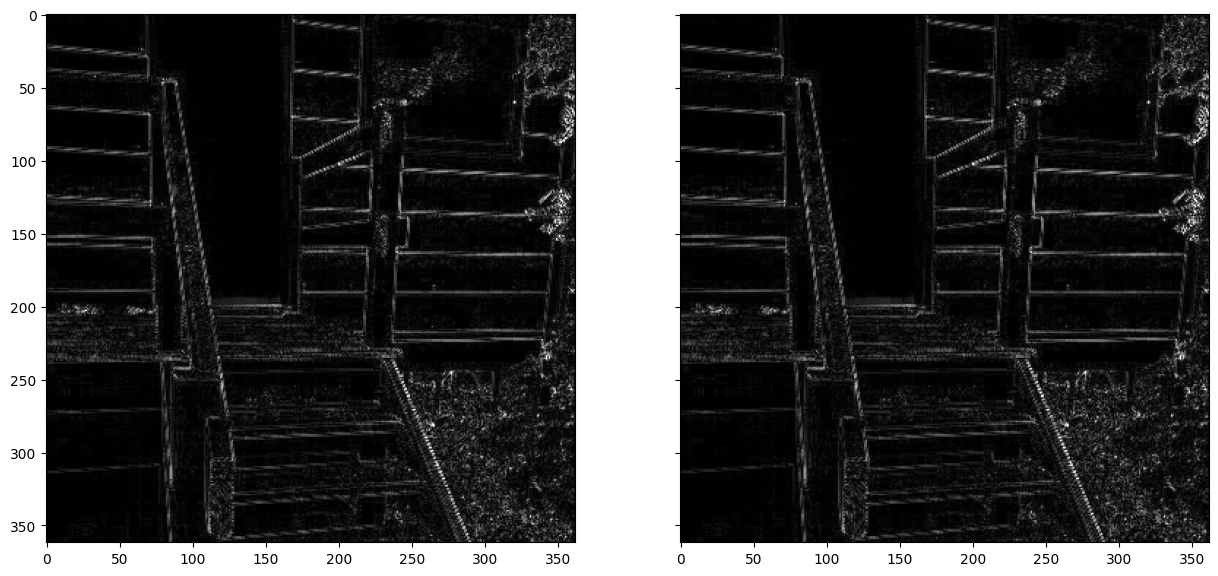

In [381]:
from skimage.filters import laplace

#Load the stairs image again

filename = 'stairs.png'#'koala.png'
img = img_as_float(io.imread(filename))

#Applying the Laplacian filter using (in-built) laplace function
img_lap1 = abs(laplace(img)) #take the absolute of the second derivative
print("In-built laplace", img_lap1.dtype, img_lap1.min(), img_lap1.max()) 

#Apply the Laplacian filter manually
#f = np.array([[-2,1,-2],[1,4,1],[-2,1,-2]]) 
#f = np.array([[1,-2,1],[-2,4,-2],[1,-2,1]])
f = np.array([[0,1,0],[1,-4,1],[0,1,0]]) 
img_lap2 = abs(ndi.convolve(img,f)) 
print("Manually laplace", img_lap2.dtype, img_lap2.min(), img_lap2.max())

ig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10), sharex = True, sharey = True) 
ax = ax.ravel()
ax[0].imshow(img_lap1, cmap = 'gray', vmin = 0, vmax = 1) #Specify min, max to better see the edges
ax[1].imshow(img_lap2, cmap = 'gray', vmin = 0, vmax = 1)  #Specify min, max to better see the edges

### Creating and applying Laplacian of Gaussian (LoG) filters "manually"

Laplacian filter is sensitive to noise (it will create several "faux" edges). To reduce this noise effect, the image is first smoothed with a Gaussian filter and then the Laplacian is applied. The combined filter is often called Laplacian-of-Gaussian or LoG. You can read [more on LoG here.](https://automaticaddison.com/how-the-laplacian-of-gaussian-filter-works/)

In [303]:
?ndi.gaussian_laplace

Signature:
ndi.gaussian_laplace(
    input,
    sigma,
    output=None,
    mode='reflect',
    cval=0.0,
    **kwargs,
)
Docstring:
Multidimensional Laplace filter using Gaussian second derivatives.

Parameters
----------
input : array_like
    The input array.
sigma : scalar or sequence of scalars
    The standard deviations of the Gaussian filter are given for
    each axis as a sequence, or as a single number, in which case
    it is equal for all axes.
output : array or dtype, optional
    The array in which to place the output, or the dtype of the
    returned array. By default an array of the same dtype as input
    will be created.
mode : str or sequence, optional
    The `mode` parameter determines how the input array is extended
    when the filter overlaps a border. By passing a sequence of modes
    with length equal to the number of dimensions of the input array,
    different modes can be specified along each axis. Default value is
    'reflect'. The valid values and thei

Recall [Part D](#Part-D), where the response of second-order difference operator was seen on a ramp edge and a regular edge. Did you observe how there are two responses (one positive and one negative) on each end of the edge? To observe these responses more carefully, we can take the absolute values. Below is the response of LoG with and without taking the absolute.

In-built laplace-of-gaussian float64 -0.046424572570155635 0.04789083856276331


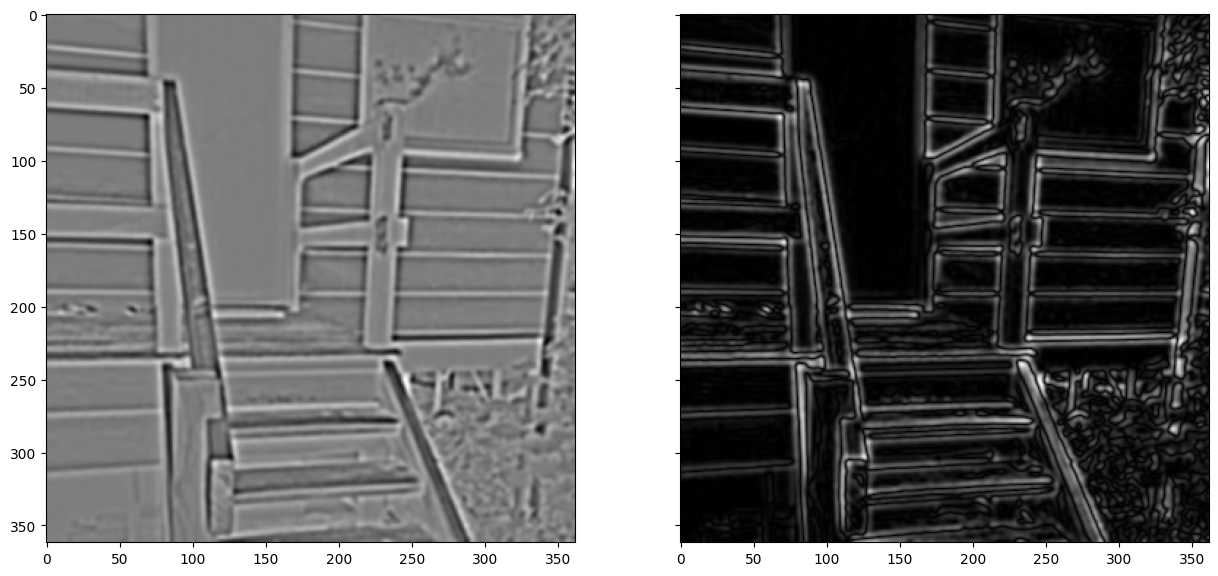

In [304]:
#Applying the in-built Laplacian of Gaussian filter (LoG)
sigma = 2

img_lap3 = ndi.gaussian_laplace(img, sigma) #second argument is sigma
print("In-built laplace-of-gaussian", img_lap3.dtype, img_lap3.min(), img_lap3.max())

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10), sharex = True, sharey = True) #figsize controls relative size of images
ax = ax.ravel()

ax[0].imshow(img_lap3, cmap = 'gray')
ax[1].imshow(abs(img_lap3), cmap = 'gray')

Using this [code](https://codereview.stackexchange.com/questions/45458/finding-a-zero-crossing-in-a-matrix) from stackoverflow, we can find zero-crossings in the image above - that shows the position of the edge!

In [305]:
# Find the zero crossing in the l_o_g image
# Done in the most naive way possible
def z_c_test(l_o_g_image):
    #print(l_o_g_image)
    z_c_image = np.zeros(l_o_g_image.shape)
    for i in range(1, l_o_g_image.shape[0] - 1):
        for j in range(1, l_o_g_image.shape[1] - 1):
            neg_count = 0
            pos_count = 0
            for a in np.arange(-1, 2):
                for b in np.arange(-1, 2):
                    if a != 0 and b != 0:
                        #print("a ", a, " b ", b)
                        if l_o_g_image[i + a, j + b] < 0:
                            neg_count += 1
                            #print("neg")
                        elif l_o_g_image[i + a, j + b] > 0:
                            pos_count += 1
                            #print("pos")
                        #else:
                        #    print("zero")

            # If all the signs around the pixel are the same
            # and they're not all zero
            # then it's not a zero crossing and an edge. 
            # Otherwise, copy it to the edge map.
            z_c = ((neg_count > 0) and (pos_count > 0))

            if z_c:
                #print("True for", i, ",", j)
                #print("pos ", pos_count, " neg ", neg_count)
                z_c_image[i, j] = 1

    return z_c_image

In [306]:
def displayZeroCrossing(img):
    zcrimg = z_c_test(img) #find zero crossings 

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10), sharex = True, sharey = True) #figsize controls relative size of images
    ax = ax.ravel()

    ax[0].imshow(img, cmap = 'gray')
    ax[1].imshow(zcrimg, cmap = 'gray')
    
    return zcrimg

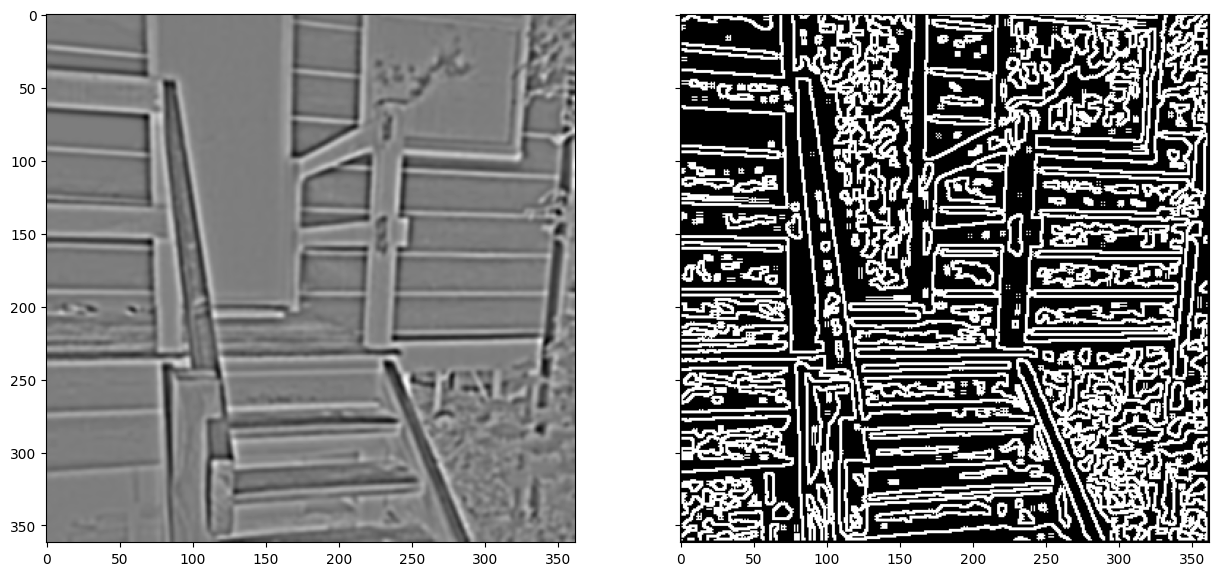

In [307]:
zcr = displayZeroCrossing(img_lap3)

That's way too many zero crossings! Let us suppress low responses in the edge image.

## Part F (5 points)
Write a function that takes as input LoG response, suppresses low responses (based on Otsu Threshold) and returns the resulting image

In [308]:
def suppressLowResponse(edgeMagImage):
    
    '''
    Suppresses low responses in the edgeMagImage using the following algorithm:
       1. Computes the absolute of the edgeMagImage (absImg)
       2. Determines a threshold from absImg automatically using the Otsu method  
       3. Creates a mask that finds low responses, 
           which are defined to be any response that is less than *half of the threshold*
       4. Uses the mask to assign low responses in edgeMagImage to 0
       5. Returns the threshold (from step 2) and the modified edgeMagImage (from step 4) in a tuple
    '''
    # YOUR CODE HERE
    absImg = abs(edgeMagImage)

    otsuThreshold = skimage.filters.threshold_otsu(absImg)

    lowResponseMask = absImg < (otsuThreshold/2)

    newEdgeMagImage = edgeMagImage
    newEdgeMagImage[lowResponseMask] = 0

    return (otsuThreshold, newEdgeMagImage)



Let us test the function with the edge magnitude image `img_lap3` (obtained for the stairs image above). Your output should look like this (after executing the code in the cell below):

![Output Zero Crossing for the code below](zeroCrossing.png)


Threshold = 0.009260151745586686
Mean of Zero Crossings = 0.0949681023167791


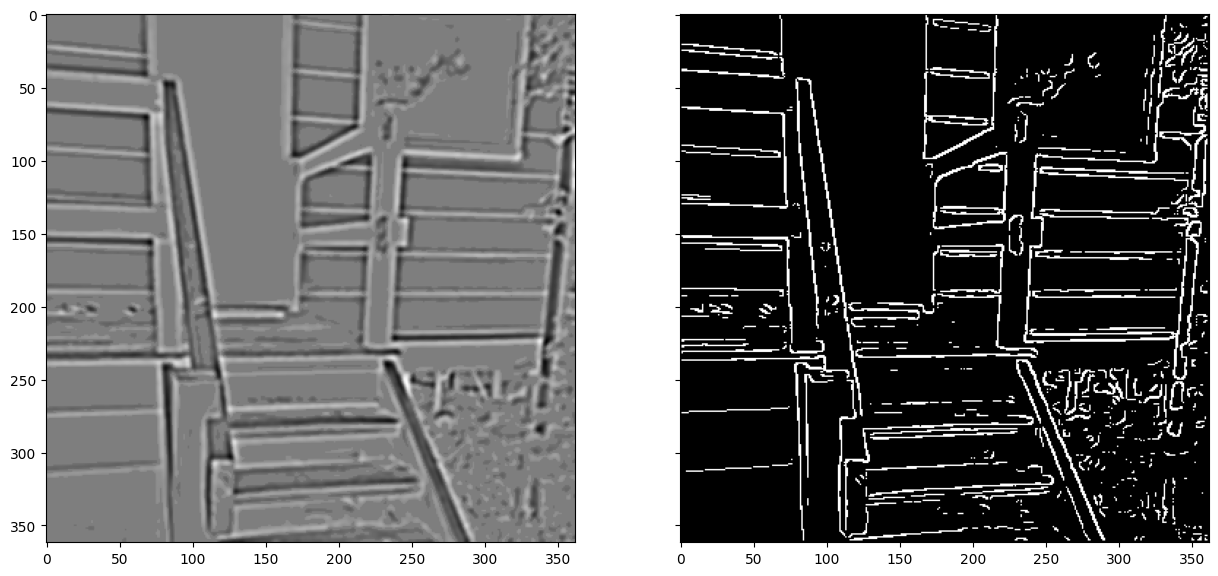

In [309]:
#Let us test the function with the edge magnitude image obtained above
thresh, suppImg = suppressLowResponse(img_lap3)
print("Threshold =", thresh) #should print 0.009260151745586686 in this case
zcr = displayZeroCrossing(suppImg)
print("Mean of Zero Crossings =", zcr.mean())

Threshold = 0.004888640234835056
Mean of Zero Crossings = 0.038216171667531516
Success!


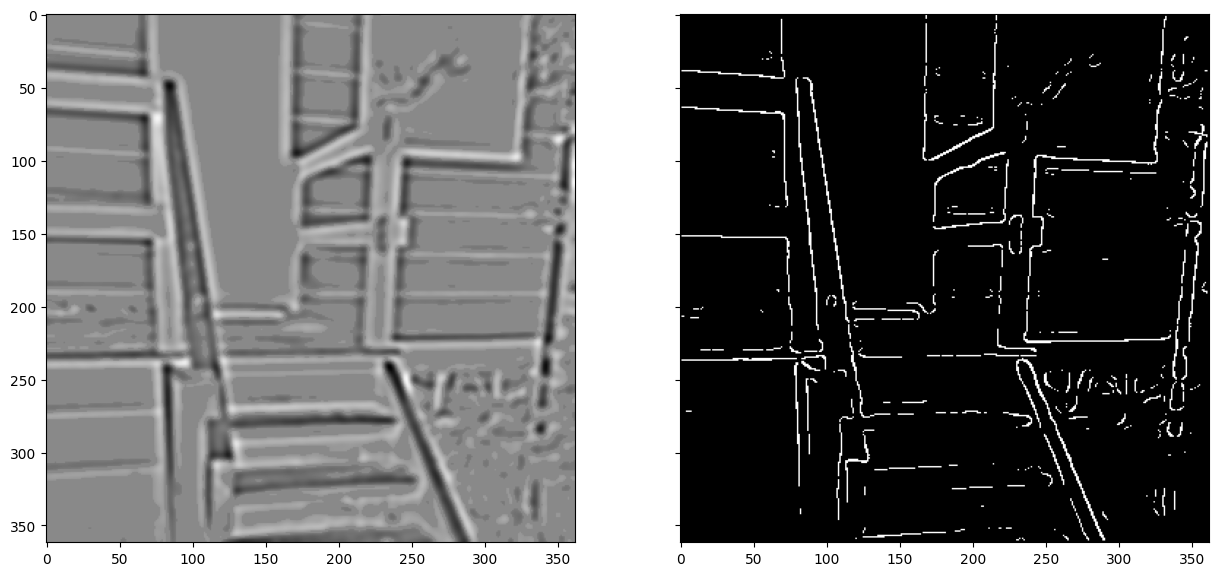

In [310]:
img = img_as_float(io.imread('stairs.png')) #load stairs image
img_lap = ndi.gaussian_laplace(img, 3) #Find LoG response using sigma=3

thresh, suppImg = suppressLowResponse(img_lap)
zcr = displayZeroCrossing(suppImg)
print("Threshold =", thresh) 
print("Mean of Zero Crossings =", zcr.mean())

assert(math.isclose(thresh, 0.00488864023))
assert(math.isclose(zcr.mean(), 0.038216171667))
print("Success!")

Threshold = 0.015760585137774785
Mean of Zero Crossings = 0.03981781005859375
Success!


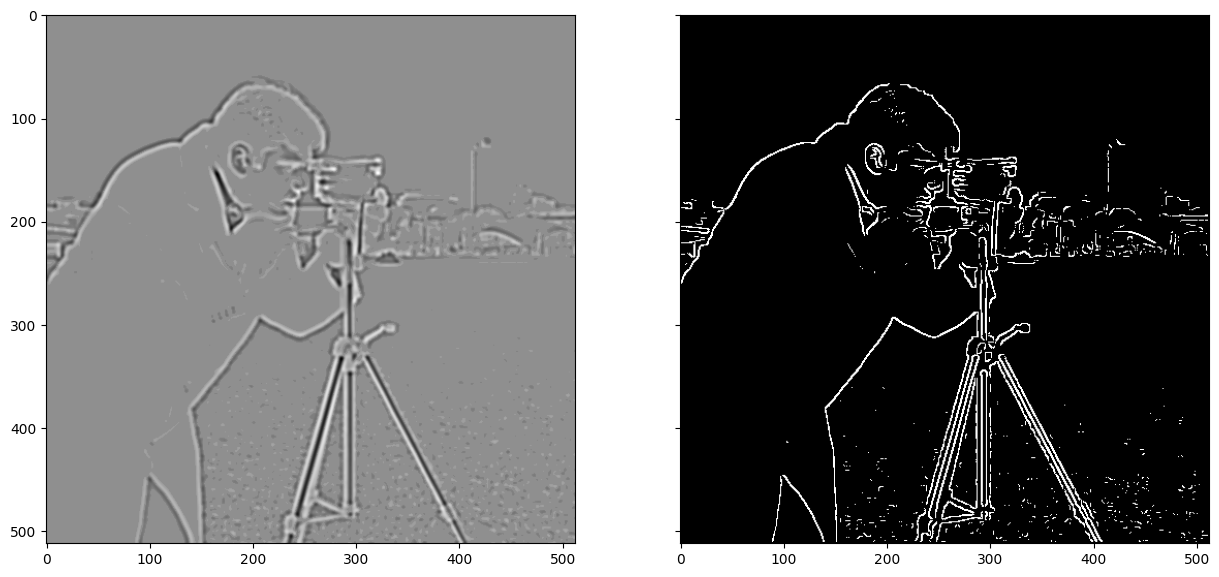

In [311]:
img = img_as_float(data.camera())
img_lap = ndi.gaussian_laplace(img, 2) #Find LoG response using sigma=2

thresh, suppImg = suppressLowResponse(img_lap)
zcr = displayZeroCrossing(suppImg)
print("Threshold =", thresh) 
print("Mean of Zero Crossings =", zcr.mean())

assert(math.isclose(thresh, 0.01576058514))
assert(math.isclose(zcr.mean(), 0.03981781005))
print("Success!")

## Part F (5 points)
Create the LoG filter manually, apply it on input image, and find the zero-crossings in the image

In [386]:
def my_LoG(img, s):
   '''
   Replaces the functionality of ndi.gaussian_laplace by:
       1. Blurring the image with a Gaussian filter truncated to 2 standard deviations
       2. Convolving the resulting image with the 3x3 laplacian filter 
       
    Returns the resulting LoG image
    '''
   assert(img.dtype == 'float64')
   # YOUR CODE HERE

   lap = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])

   guassianImg = ndi.gaussian_filter(img, sigma = s, truncate=2.0)

   logImg = abs(ndi.convolve(guassianImg, lap))

   return logImg

Threshold = 0.009242258689481128
Mean of Zero Crossings = 0.0


AssertionError: 

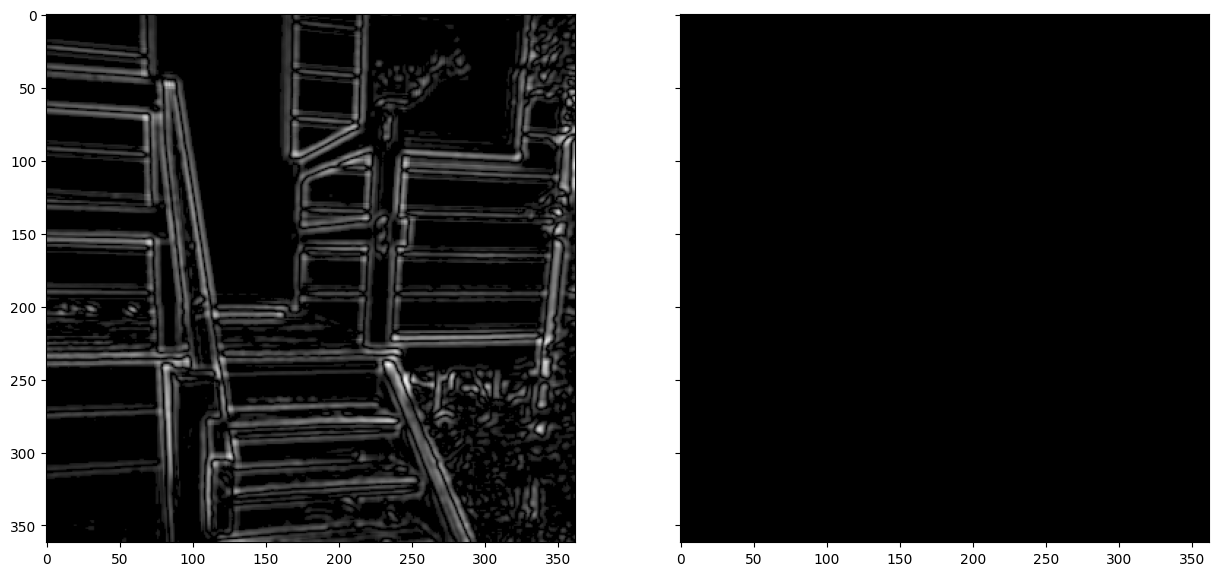

In [387]:
img = img_as_float(io.imread('stairs.png')) #load stairs image
img_lap = my_LoG(img, 2) #Find LoG response using sigma=2

thresh, suppImg = suppressLowResponse(img_lap)
zcr = displayZeroCrossing(suppImg)
print("Threshold =", thresh) 
print("Mean of Zero Crossings =", zcr.mean())

assert(math.isclose(thresh, 0.009242258689))
assert(math.isclose(zcr.mean(), 0.09264063978))
print("Success!")

Threshold = 0.013082367713174958
Mean of Zero Crossings = 0.0


AssertionError: 

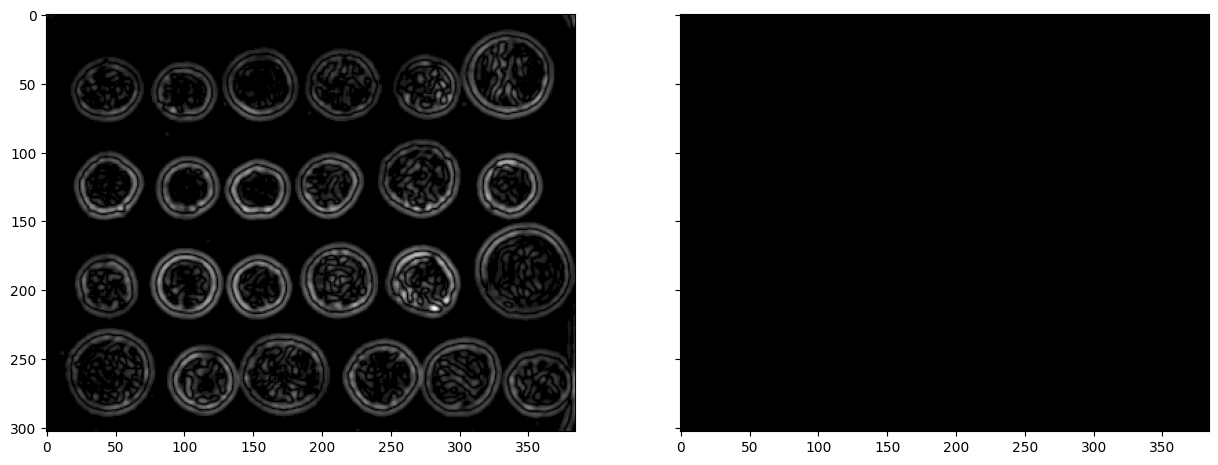

In [342]:
img = img_as_float(data.coins()) #load coins image
img_lap = my_LoG(img, 2.5) #Find LoG response using sigma=2.5

thresh, suppImg = suppressLowResponse(img_lap)
zcr = displayZeroCrossing(suppImg)
print("Threshold =", thresh) 
print("Mean of Zero Crossings =", zcr.mean())

assert(math.isclose(thresh, 0.0086607309102))
assert(math.isclose(zcr.mean(), 0.07703348459))
print("Success!")

Make sure to test your code on additional test images